# Selecting the best model for predicting the selling price

### Importing the standard libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [27]:
dataset = pd.read_csv('../assets/car-details-for-ml.csv')

dataset.head()

,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,selling_price
0,2014,145500,0,0,1,0,5.0,23.40,1248,74.00,...,0,0,0,0,0,0,0,0,0,450000
1,2014,120000,0,0,1,2,5.0,21.14,1498,103.52,...,0,0,0,0,1,0,0,0,0,370000
2,2006,140000,1,0,1,3,5.0,17.70,1497,78.00,...,0,0,0,0,0,0,0,0,0,158000
3,2010,127000,0,0,1,0,5.0,23.00,1396,90.00,...,0,0,0,0,0,0,0,0,0,225000
4,2007,120000,1,0,1,0,5.0,16.10,1298,88.20,...,0,0,0,0,0,0,0,0,0,130000


In [28]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting data to train and test sets

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Defining methods for helping to evaluate the models

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

labels = ['Model', 'R2', 'RMSE']
results = []

def model_evaluation(model: str, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    results.append([model, r2, rmse])
    return [model, r2, rmse]

In [73]:
# Plots 250 predictions and actual values against each other

def plot_results_graph(model: str, y_test, y_pred):
    plt.figure(figsize=(20, 8))
    result = pd.DataFrame({'Predicted value' : y_pred, 'Actual value' : y_test})
    plt.plot(result[:250])
    plt.title(model)
    plt.legend(['Actual value','Predicted value'])
    plt.show()

## Linear Regression

We will start out by testing the Linear Regression model, as a lot of the features seemed to have a linear relation with one another.

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Predicting the selling price from the test set**

In [31]:
y_pred = lin_reg.predict(X_test)

np.set_printoptions(precision=2)
pred_vs_actual = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

print(pred_vs_actual[:8])

[[ 497119.66  600000.  ]
 [ 361110.61  185000.  ]
 [ 538390.16  345000.  ]
 [ 689006.18  800000.  ]
 [ 704537.58  800000.  ]
 [ 311043.63  380000.  ]
 [2784758.92 2450000.  ]
 [1028359.6  1325000.  ]]


Some of the results are not very good and some are pretty close. I don't think this model is the best, so let's evaluate it and see if we can find a better fit.

### Evaluating the model

In [49]:
lin_reg_result = model_evaluation('Linear Regression', y_test, y_pred)

for i in range(len(lin_reg_result)):
    print(labels[i], ':', lin_reg_result[i])

Model : Linear Regression
R2 : 0.8322434678717304
RMSE : 224888.6938125662


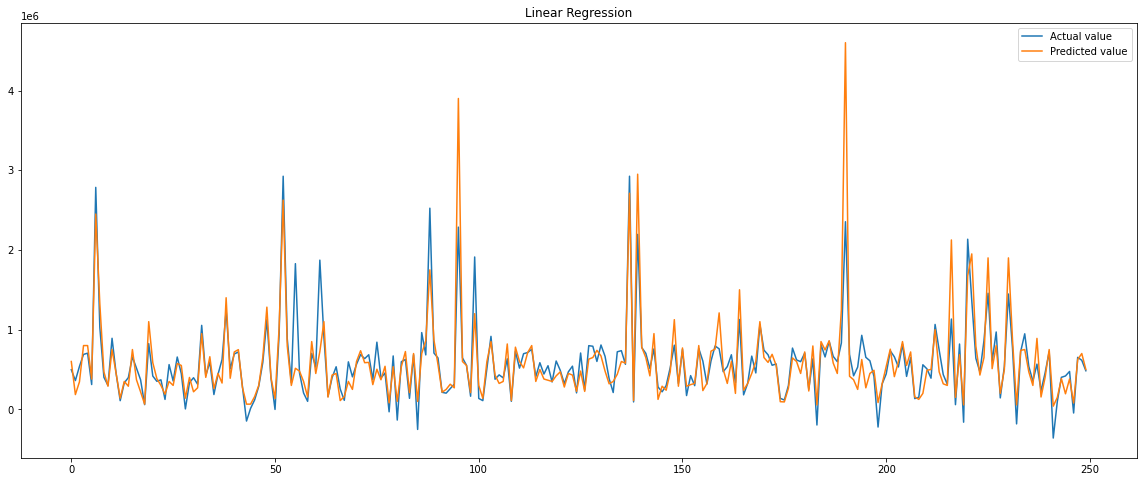

In [74]:
plot_results_graph('Linear Regression', y_test, y_pred)